# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"  # Built-in API request by city name with units 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | khandyga
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | kaa-khem
Processing Record 5 of Set 1 | krasnovishersk
Processing Record 6 of Set 1 | burang
Processing Record 7 of Set 1 | usinsk
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | gangtok
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | marka
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | abidjan
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set 1 | awjilah
Processing Record 23 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,78,21,1.34,NZ,1738566108
1,khandyga,62.6667,135.6000,-40.78,99,100,0.55,RU,1738566109
2,talnakh,69.4865,88.3972,-23.37,95,100,2.45,RU,1738566110
3,kaa-khem,51.6833,94.7333,-13.83,91,100,1.25,RU,1738566112
4,krasnovishersk,60.4078,57.0820,-6.79,94,100,3.80,RU,1738566113


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,78,21,1.34,NZ,1738566108
1,khandyga,62.6667,135.6000,-40.78,99,100,0.55,RU,1738566109
2,talnakh,69.4865,88.3972,-23.37,95,100,2.45,RU,1738566110
3,kaa-khem,51.6833,94.7333,-13.83,91,100,1.25,RU,1738566112
4,krasnovishersk,60.4078,57.0820,-6.79,94,100,3.80,RU,1738566113


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

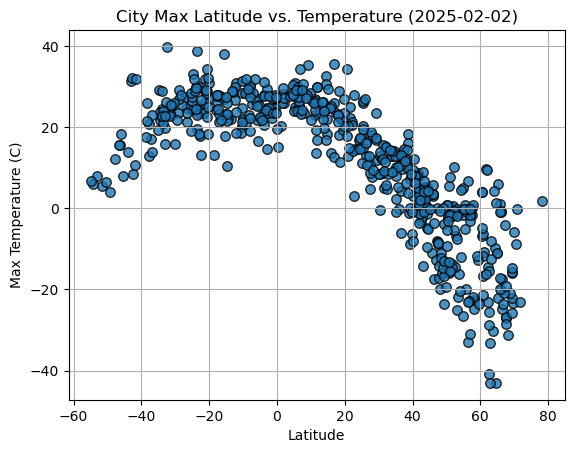

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', title='City Max Latitude vs. Temperature (2025-02-02)',edgecolors='black', grid=True, s=47, alpha = 0.80)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

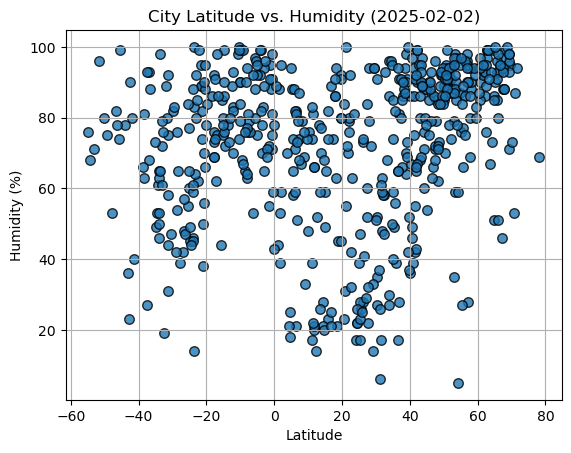

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', title='City Latitude vs. Humidity (2025-02-02)',edgecolors='black', grid=True, s=47, alpha = 0.80)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

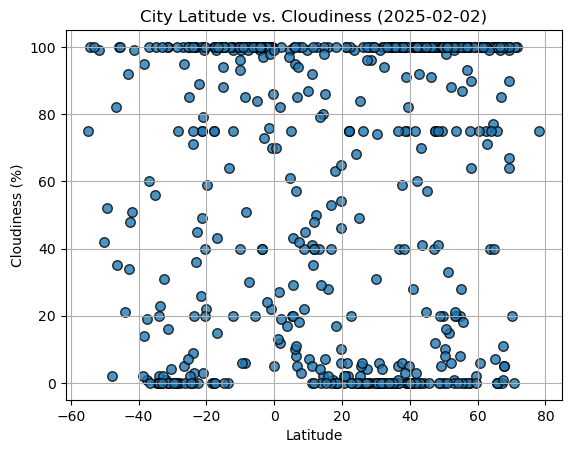

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', title='City Latitude vs. Cloudiness (2025-02-02)',edgecolors='black', grid=True, s=47, alpha = 0.80)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

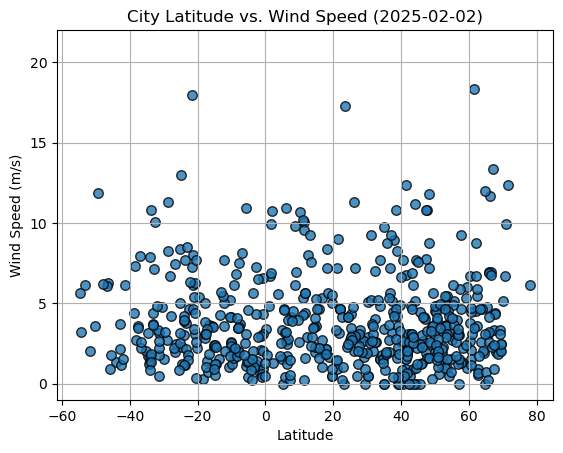

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', title='City Latitude vs. Wind Speed (2025-02-02)',edgecolors='black', grid=True, s=47, alpha = 0.80)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.ylim(-1, 22) # Used this beacuse y labels were in (#.#) instead of whole numbers
plt.tight_layout

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, ylabel, title, text_coordinates): # Creates a scatter plot with a linear regression
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Label plot and annotate the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    # Print r^2 value
    print(f"The r-value is: {rvalue**2}")
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,khandyga,62.6667,135.6000,-40.78,99,100,0.55,RU,1738566109
2,talnakh,69.4865,88.3972,-23.37,95,100,2.45,RU,1738566110
3,kaa-khem,51.6833,94.7333,-13.83,91,100,1.25,RU,1738566112
4,krasnovishersk,60.4078,57.0820,-6.79,94,100,3.80,RU,1738566113
5,burang,30.2500,81.1667,-0.28,35,0,2.89,CN,1738566114


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,78,21,1.34,NZ,1738566108
11,coquimbo,-29.9533,-71.3436,15.85,82,0,1.54,CL,1738566107
12,puerto natales,-51.7236,-72.4875,5.47,96,99,2.02,CL,1738566122
14,grytviken,-54.2811,-36.5092,6.03,68,100,3.21,GS,1738566125
19,port-aux-francais,-49.3500,70.2167,3.95,75,52,11.89,TF,1738566131


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.745592899923645


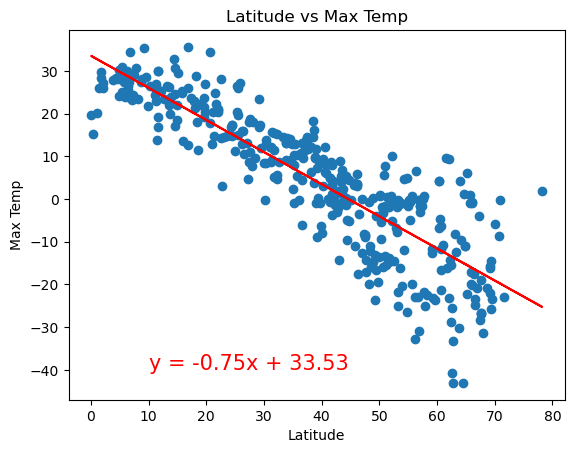

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", "Latitude vs Max Temp",(10,-40))

The r-value is: 0.17713054760294764


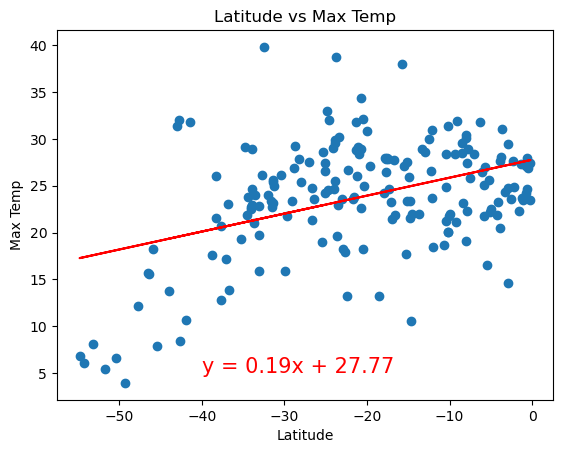

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", "Latitude vs Max Temp",(-40,5))

**Discussion about the linear relationship:** The linear regression line for temperature vs latitude is negative in the Northern Hemisphere and is positive in the Southern Hemisphere. At the equator the sun will cause the temperature to be warmer closer to zero. As the latitude becomes greater, in the Northern Hemisphere, the temperature goes down.
- The correlation between northern hemisphere latitude vs max temperature is 0.75. This shows a strong positive correlation between latitude and max temperature.
- The correlation between southern hemisphere latitude vs max temperature is 0.18. This indicates no correlation between latitude and max temperature.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21346658327309986


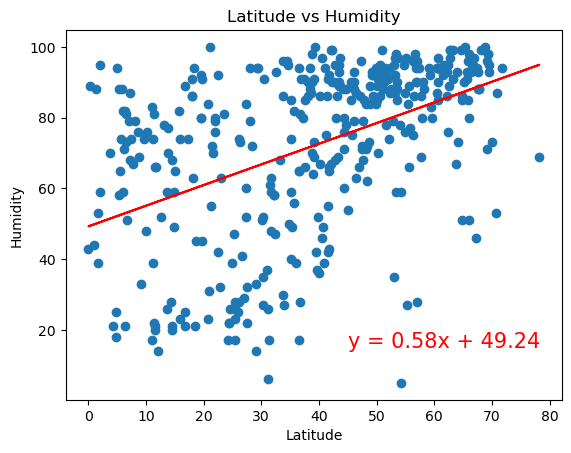

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", "Latitude vs Humidity",(45,15))

The r-value is: 0.1038464964645498


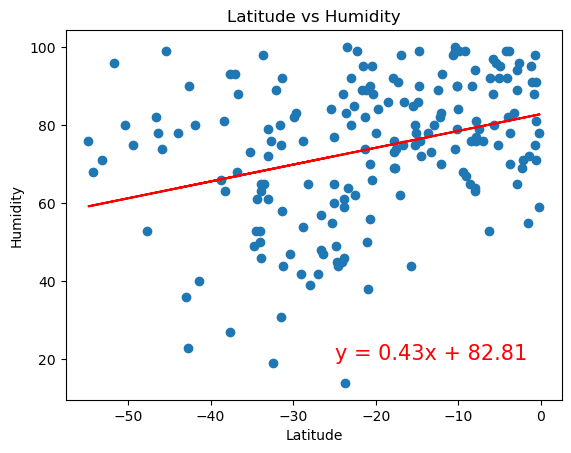

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", "Latitude vs Humidity",(-25,20))

**Discussion about the linear relationship:** The linear regression line for latitude vs humidity is positive in both Northen Hemiphere and Southern Hemisphere. 
- The correlation between northern hemisphere latitude vs humidity is 0.21. This indicates no correlation between latitude and humidity.
- The correlation between southern hemisphere latitude vs humidity is 0.10. This indicates no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06279571457495059


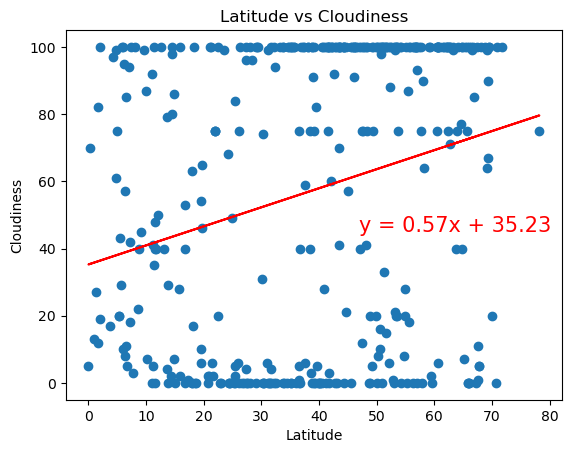

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", "Latitude vs Cloudiness",(47,45))

The r-value is: 0.1302963051324415


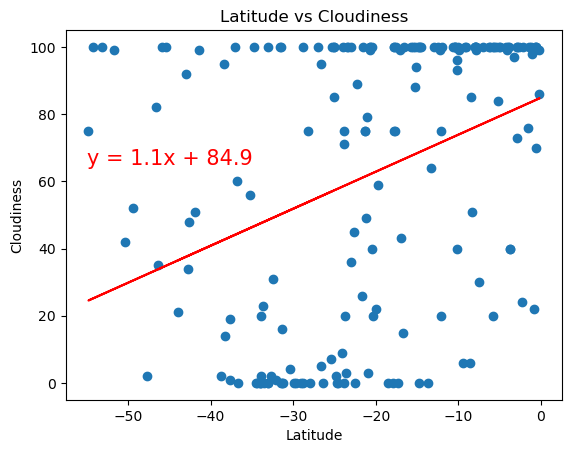

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", "Latitude vs Cloudiness",(-55,65))

**Discussion about the linear relationship:** The linear regression line for latitude vs cloudiness is positive in both Northen Hemiphere and Southern Hemisphere. 
- The correlation between northern hemisphere latitude vs cloudiness is 0.06. This indicates no correlation between latitude and cloudiness.
- The correlation between southern hemisphere latitude vs cloudiness is 0.13. This indicates no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0001474394265794088


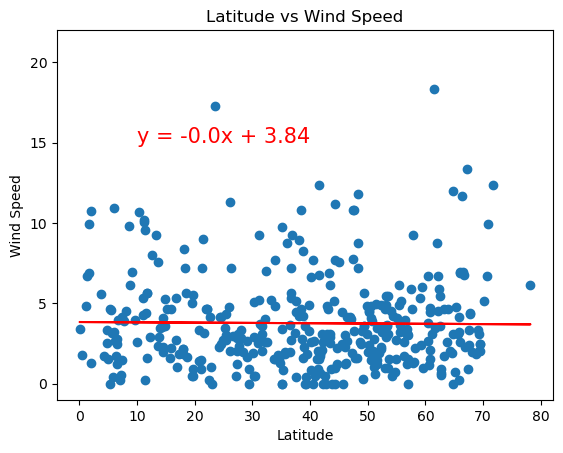

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylim(-1, 22) # Used this beacuse y labels were in (#.#) instead of whole numbers
plot_linear_regression(x_values, y_values, "Wind Speed", "Latitude vs Wind Speed",(10,15))

The r-value is: 0.03149564954201979


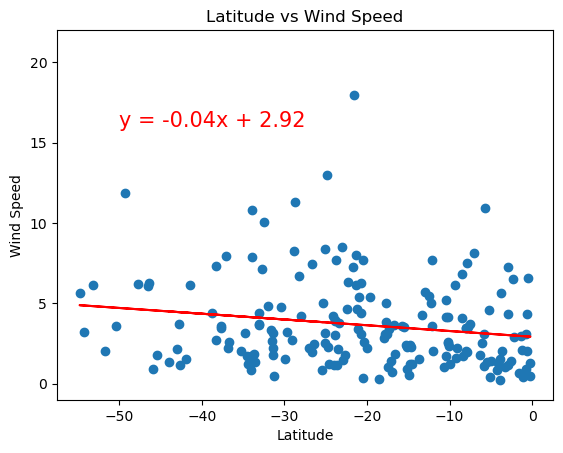

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylim(-1, 22) # Used this beacuse y labels were in (#.#) instead of whole numbers
plot_linear_regression(x_values, y_values, "Wind Speed", "Latitude vs Wind Speed",(-50,16))

**Discussion about the linear relationship:** The linear regression line for latitude vs wind speed is negative in both Northen Hemiphere and Southern Hemisphere. 
- The correlation between northern hemisphere latitude vs wind speed is 0.001. This indicates no correlation between latitude and wind speed.
- The correlation between southern hemisphere latitude vs wind speed is 0.03. This indicates no correlation between latitude and wind speed.

 **Conclusion:** The only significant correlation is a direct correlation in the Northern Hemisphere of latitude vs temperature.